In [1]:
from bank import Bank
from players import SesquaGreedyPlayer, GreedyPlayer, ThersholdPlayer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
number_of_rounds = [i for i in range(1, 200, 2)]

threshold = 250

sesqua_win_pct = []
sesqua_tie_pct = []
greedy_win_pct = []
greedy_tie_pct = []

thresh_win_pct_sesqua = []
thresh_win_pct_greedy = []


for rounds in number_of_rounds:
    print(rounds)
    players = [SesquaGreedyPlayer(), ThersholdPlayer(threshold=threshold)]
    win_pct, tie_pct = Bank.estimate_win_probability(players, rounds=rounds, num_simulations=1000)
    sesqua_win_pct.append(win_pct[0])
    sesqua_tie_pct.append(tie_pct[0])
    thresh_win_pct_sesqua.append(win_pct[1])


    players = [GreedyPlayer(), ThersholdPlayer(threshold=threshold)]
    win_pct, tie_pct = Bank.estimate_win_probability(players, rounds=rounds, num_simulations=1000)
    greedy_win_pct.append(win_pct[0])
    greedy_tie_pct.append(tie_pct[0])
    thresh_win_pct_greedy.append(win_pct[1])

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199


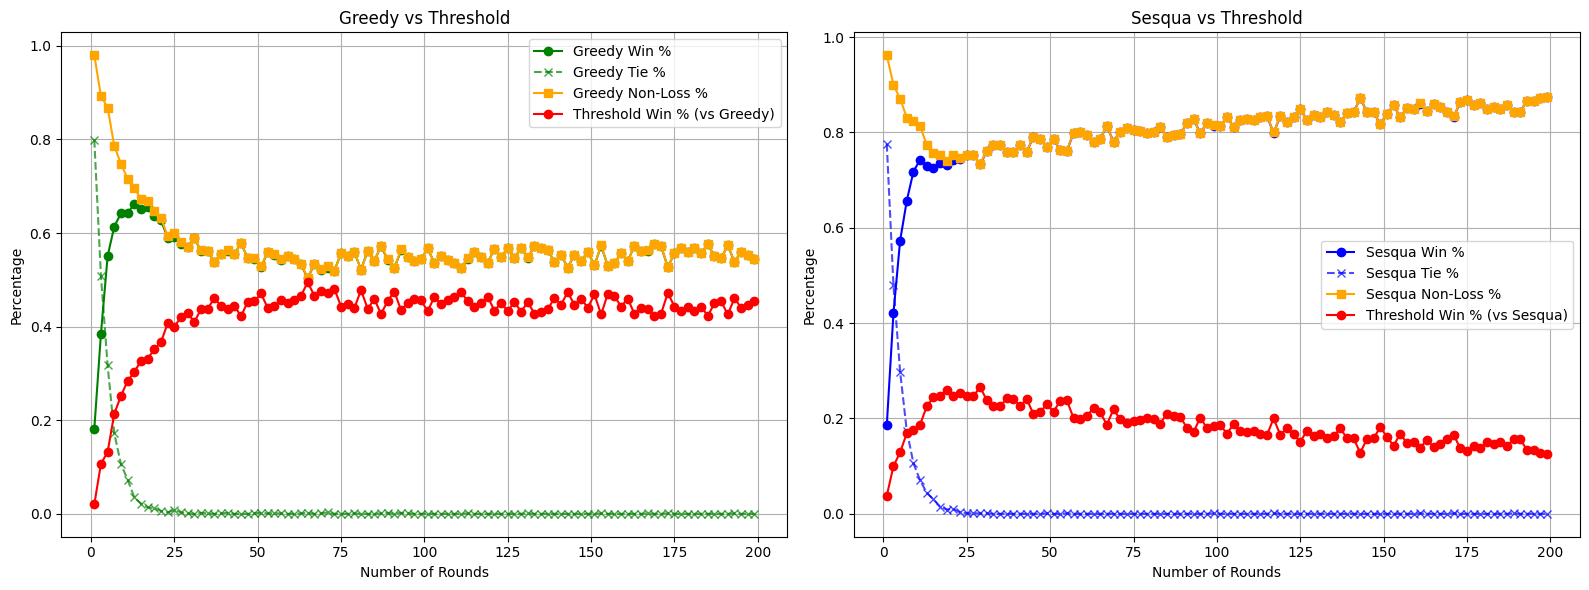

In [3]:

# Non-loss rate is (win % + tie %) for each strategy.
sesqua_non_loss = [w + t for w, t in zip(sesqua_win_pct, sesqua_tie_pct)]
greedy_non_loss = [w + t for w, t in zip(greedy_win_pct, greedy_tie_pct)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left subplot: Greedy
ax1.plot(number_of_rounds, greedy_win_pct, label="Greedy Win %", marker='o', color='green')
ax1.plot(number_of_rounds, greedy_tie_pct, label="Greedy Tie %", marker='x', linestyle='--', color='green', alpha=0.7)
ax1.plot(number_of_rounds, greedy_non_loss, label="Greedy Non-Loss %", color='orange', linestyle='-', marker='s')
ax1.plot(number_of_rounds, thresh_win_pct_greedy, label="Threshold Win % (vs Greedy)", color='red', linestyle='-', marker='o')
ax1.set_xlabel("Number of Rounds")
ax1.set_ylabel("Percentage")
ax1.set_title("Greedy vs Threshold")
ax1.legend()
ax1.grid(True)

# Right subplot: Sesqua
ax2.plot(number_of_rounds, sesqua_win_pct, label="Sesqua Win %", marker='o', color='blue')
ax2.plot(number_of_rounds, sesqua_tie_pct, label="Sesqua Tie %", marker='x', linestyle='--', color='blue', alpha=0.7)
ax2.plot(number_of_rounds, sesqua_non_loss, label="Sesqua Non-Loss %", color='orange', linestyle='-', marker='s')
ax2.plot(number_of_rounds, thresh_win_pct_sesqua, label="Threshold Win % (vs Sesqua)", color='red', linestyle='-', marker='o')
ax2.set_xlabel("Number of Rounds")
ax2.set_ylabel("Percentage")
ax2.set_title("Sesqua vs Threshold")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig("round_effect.png")
plt.show()


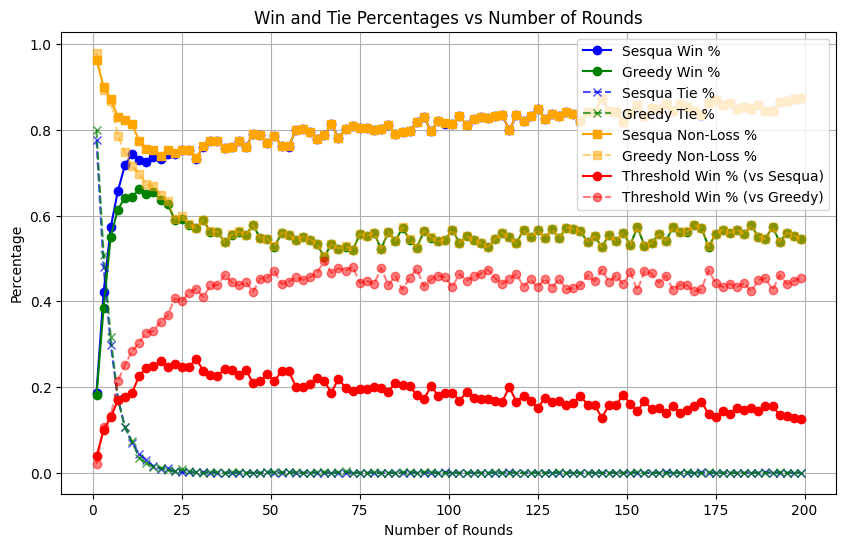

In [4]:

plt.figure(figsize=(10, 6))
plt.plot(number_of_rounds, sesqua_win_pct, label="Sesqua Win %", marker='o', color='blue')
plt.plot(number_of_rounds, greedy_win_pct, label="Greedy Win %", marker='o', color='green')
plt.plot(number_of_rounds, sesqua_tie_pct, label="Sesqua Tie %", marker='x', linestyle='--', color='blue', alpha=0.7)
plt.plot(number_of_rounds, greedy_tie_pct, label="Greedy Tie %", marker='x', linestyle='--', color='green', alpha=0.7)
# Non-loss rate is (win % + tie %) for each strategy.
sesqua_non_loss = [w + t for w, t in zip(sesqua_win_pct, sesqua_tie_pct)]
greedy_non_loss = [w + t for w, t in zip(greedy_win_pct, greedy_tie_pct)]
plt.plot(number_of_rounds, sesqua_non_loss, label="Sesqua Non-Loss %", color='orange', linestyle='-', marker='s')
plt.plot(number_of_rounds, greedy_non_loss, label="Greedy Non-Loss %", color='orange', linestyle='--', marker='s', alpha=0.5)
# threshold win %
plt.plot(number_of_rounds, thresh_win_pct_sesqua, label="Threshold Win % (vs Sesqua)", color='red', linestyle='-', marker='o')
plt.plot(number_of_rounds, thresh_win_pct_greedy, label="Threshold Win % (vs Greedy)", color='red', linestyle='--', marker='o', alpha=0.5)
plt.xlabel("Number of Rounds")
plt.ylabel("Percentage")
plt.title("Win and Tie Percentages vs Number of Rounds")
plt.legend()
plt.grid(True)
plt.savefig("round_effect_1.png")
plt.show()


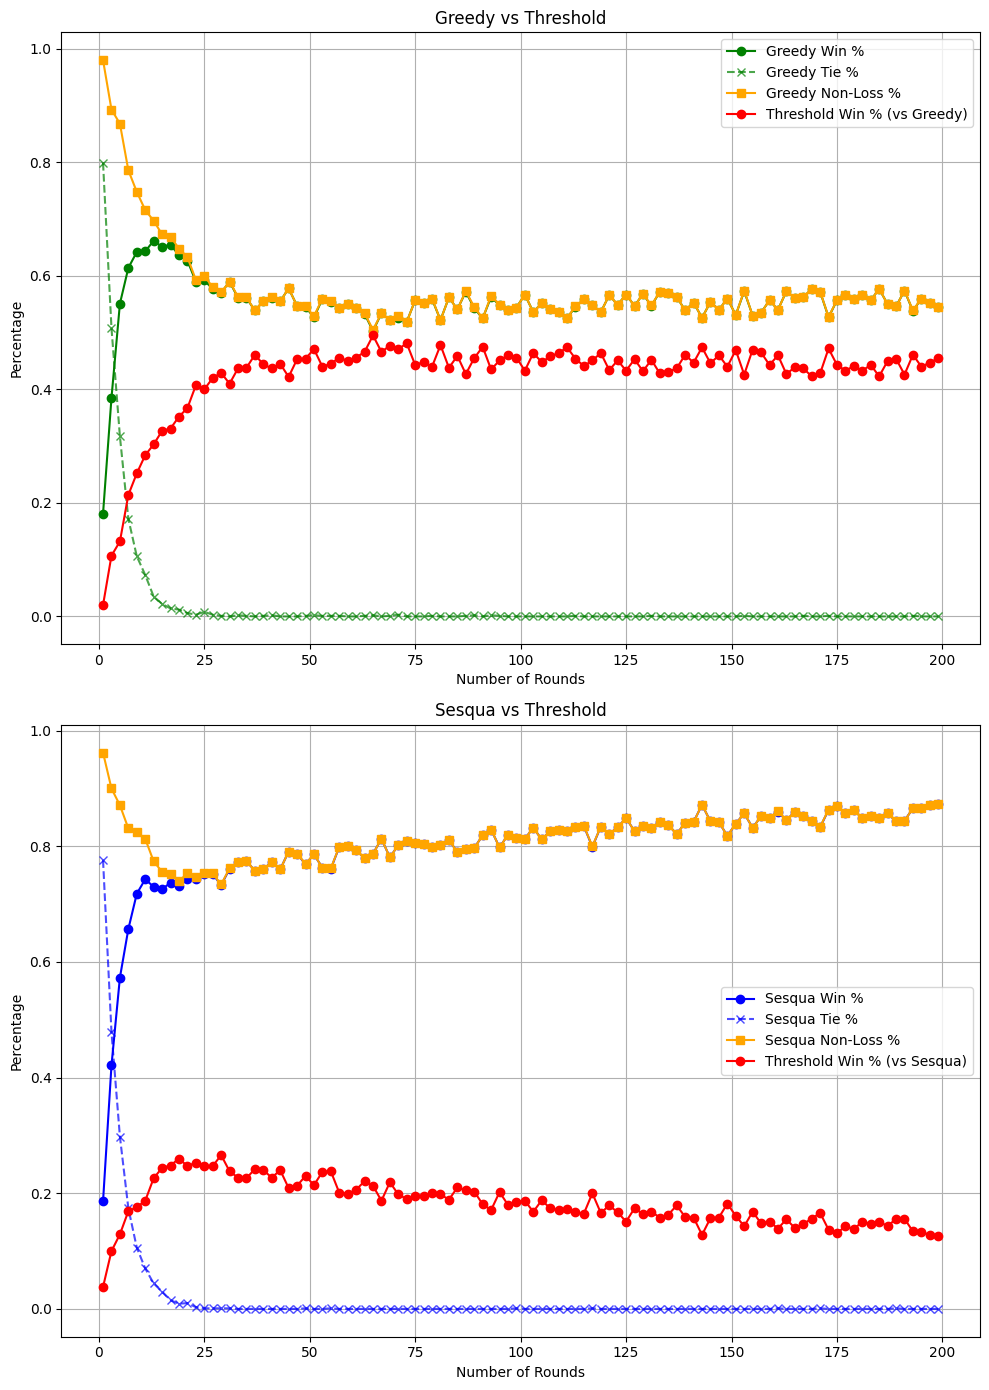

In [6]:

# Non-loss rate is (win % + tie %) for each strategy.
sesqua_non_loss = [w + t for w, t in zip(sesqua_win_pct, sesqua_tie_pct)]
greedy_non_loss = [w + t for w, t in zip(greedy_win_pct, greedy_tie_pct)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))

# Left subplot: Greedy
ax1.plot(number_of_rounds, greedy_win_pct, label="Greedy Win %", marker='o', color='green')
ax1.plot(number_of_rounds, greedy_tie_pct, label="Greedy Tie %", marker='x', linestyle='--', color='green', alpha=0.7)
ax1.plot(number_of_rounds, greedy_non_loss, label="Greedy Non-Loss %", color='orange', linestyle='-', marker='s')
ax1.plot(number_of_rounds, thresh_win_pct_greedy, label="Threshold Win % (vs Greedy)", color='red', linestyle='-', marker='o')
ax1.set_xlabel("Number of Rounds")
ax1.set_ylabel("Percentage")
ax1.set_title("Greedy vs Threshold")
ax1.legend()
ax1.grid(True)

# Right subplot: Sesqua
ax2.plot(number_of_rounds, sesqua_win_pct, label="Sesqua Win %", marker='o', color='blue')
ax2.plot(number_of_rounds, sesqua_tie_pct, label="Sesqua Tie %", marker='x', linestyle='--', color='blue', alpha=0.7)
ax2.plot(number_of_rounds, sesqua_non_loss, label="Sesqua Non-Loss %", color='orange', linestyle='-', marker='s')
ax2.plot(number_of_rounds, thresh_win_pct_sesqua, label="Threshold Win % (vs Sesqua)", color='red', linestyle='-', marker='o')
ax2.set_xlabel("Number of Rounds")
ax2.set_ylabel("Percentage")
ax2.set_title("Sesqua vs Threshold")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig("round_effect_2.png")
plt.show()
